In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
from fredapi import Fred

In [2]:
fred_key = 'd07ab88482d2654a4ff77da70a7f645a'

In [3]:
#Creating a Fred obj

In [4]:
fred = Fred(api_key=fred_key)

In [5]:
# search fred for economic data

In [6]:
snp_search = fred.search('S&P', order_by='popularity')

In [7]:
snp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-07-29,2024-07-29,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-07-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-26 08:26:08-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-07-29,2024-07-29,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-07-29,2024-07-29,S&P 500,2014-07-28,2024-07-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-26 19:52:45-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-07-29,2024-07-29,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-07-29,2024-07-29,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-07-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-26 08:26:11-05:00,82,This data represents the effective yield of th...


In [8]:
# pulling data

<Axes: title={'center': 'S&P 500'}>

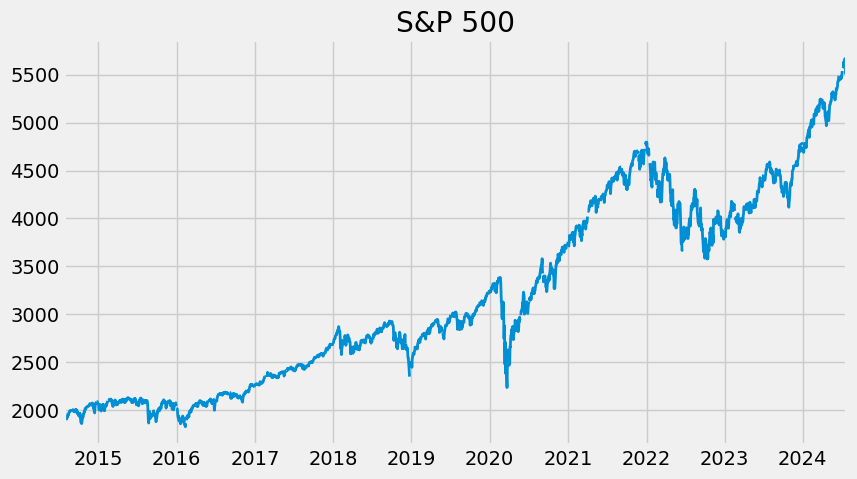

In [9]:
sp500=fred.get_series(series_id='SP500')
sp500.plot(figsize=(9, 5), title='S&P 500', lw=2)

In [10]:
#join multiple data series

In [52]:
unemp_state = fred.search('Unemployment rate state', filter=('frequency', 'Monthly'))
une_state = unemp_state.query('seasonal_adjustment =="Seasonally Adjusted" and units=="Percent"')
une_state = une_state.loc[une_state['title'].str.contains('Unemployment Rate in ')]

(59, 15)

In [55]:
all_results=[]

for id in une_state.index:
    results = fred.get_series(id)
    results = results.to_frame(name=id)
    all_results.append(results)
unem_result = pd.concat(all_results, axis=1)

In [56]:
id_state=une_state['title'].str.replace('Unemployment Rate in ', '').to_dict()
unem_result.columns = [id_state[i] for i in unem_result.columns]

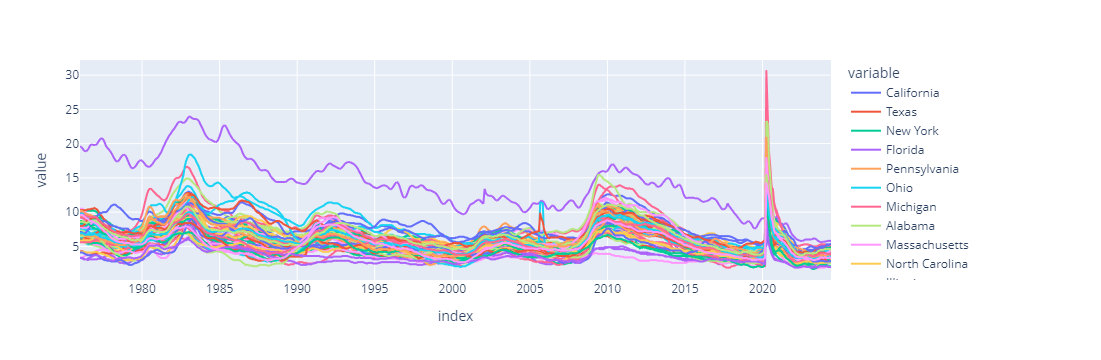

In [57]:
px.line(unem_result)

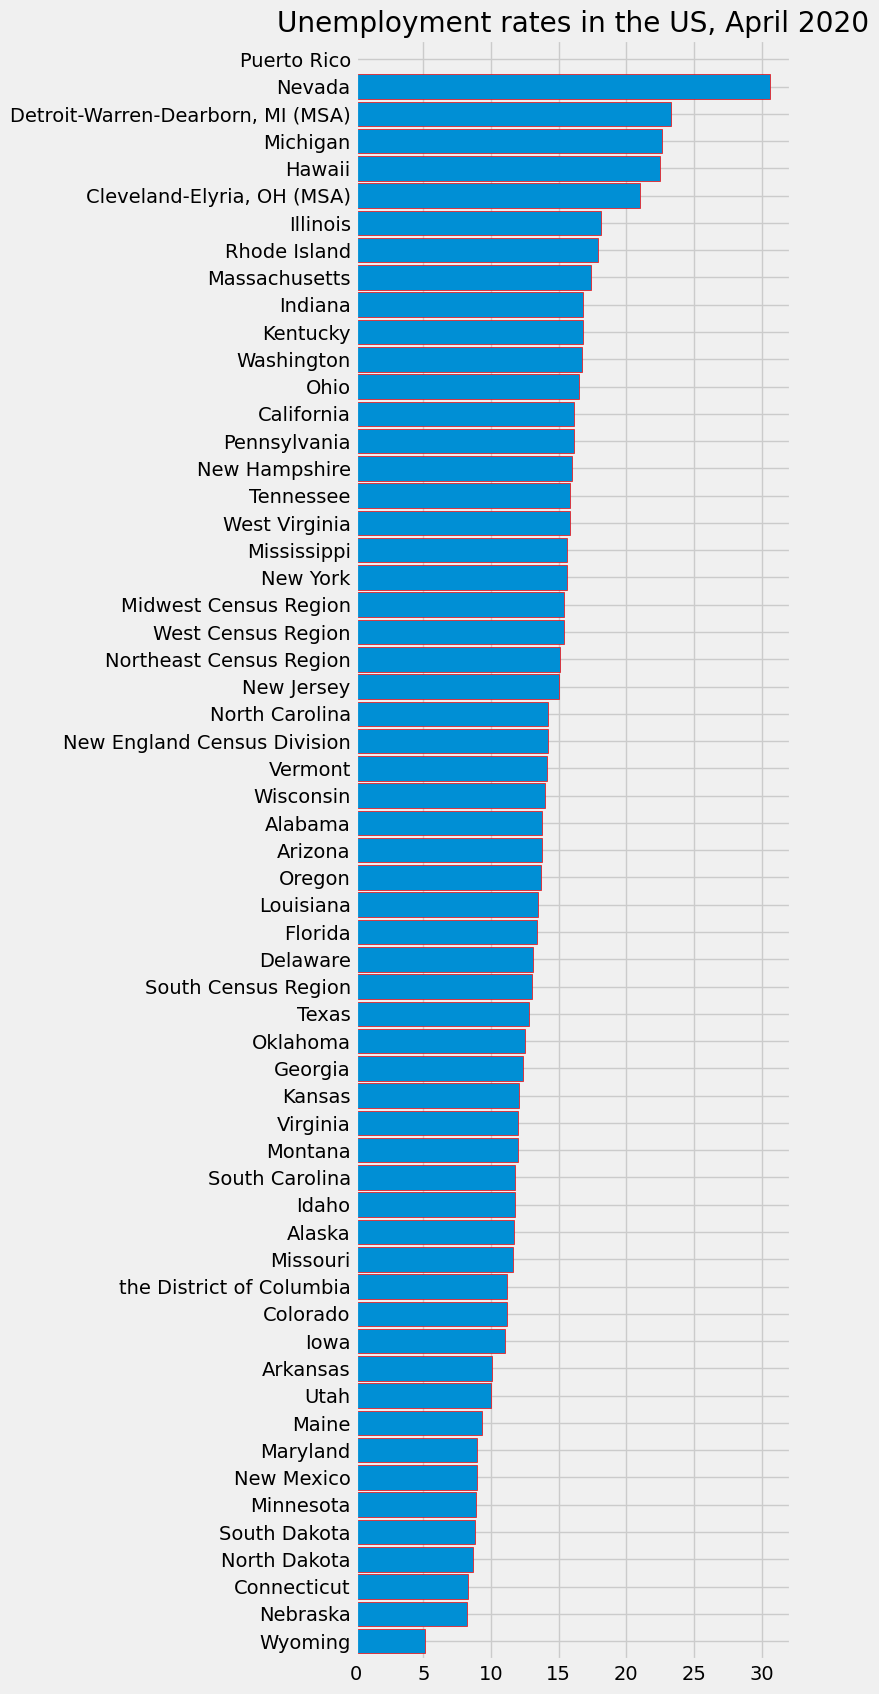

In [58]:
ax = unem_result.loc[unem_result.index == '2020-04-01'].T.sort_values('2020-04-01').plot(kind='barh', figsize=(5, 20), width=0.9,edgecolor='red',\
                                                                                   title='Unemployment rates in the US, April 2020')
ax.legend().remove()